In [1]:
#**************************************************************
#**************************************************************
#**************************************************************
# 
# - This Python file contains a demonstration of the Bayesian 
# maximum variance inclusion (BMVI) sampling. The BMVI is 
# compared against simple random sampling (SRS) and local pivotal
# method (LPM) with synthetic data generated from a random 
# Gaussian mixture module function. Both samplers are tested
# with the standard regularized least squares (RLS) prediction 
# method with a linear kernel. Prediction performance and 
# hyperparameter selection is implemented via 10-fold cross-validation. 
# 
# If one wishes to implement BMVI via other prediction methods
# then the respective Hessian and gradient (see the corresponding
# article) needs to be edited. 
#
#**************************************************************
#**************************************************************
#**************************************************************

# STEP 1: Import the relevant modules. 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from bmvi_toolbox import *
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
%matplotlib inline

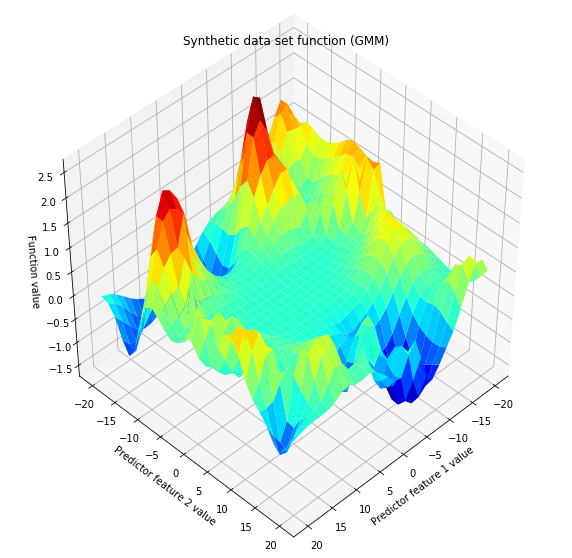

In [2]:
# STEP 2: Load the synthetic data set generated from a random Gaussian mixture model function.

# Data contains spatial autocorrelation thus mimicking natural phenomena. 
X = np.loadtxt('X.txt', delimiter=',')
y = np.loadtxt('y.txt', delimiter=',')

# For plotting the input data, create meshgrids from the data.  
x_grid = np.reshape(X[:,1], (30,30))
y_grid = np.reshape(X[:,2], (30,30))
z_grid = np.reshape(y, (30,30))
# Plot the synthetic data in a 3D-plot for illustration. 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='jet')
ax.set_xlabel('Predictor feature 1 value')
ax.set_ylabel('Predictor feature 2 value')
ax.set_zlabel('Function value')
ax.set_title('Synthetic data set function (GMM)')
ax.view_init(azim=45, elev=45)
plt.show()

In [5]:
# STEP 3: Implement SRS and BMVI sampling with the synthetic data using RLS prediction model. 

# Do sampling. 
print("Starting SRS sampling...\n")
SRS_inclusion_index_set, SRS_generalization_error_list = SRS(X, y, len(y))
print("Finished SRS sampling.\n")
print("Starting LPM sampling...\n")
initial_inclusion_probabilities = 0.99
LPM_inclusion_index_set, LPM_generalization_error_list = LPM(X, y, len(y), initial_inclusion_probabilities)
print("Finished LPM sampling.\n")
print("Starting BMVI sampling...\n")
BMVI_inclusion_index_set, BMVI_generalization_error_list = BMVI(X, y, len(y))
print("Finished BMVI sampling, plotting the results...\n")

Starting SRS sampling...

SRS sampling 1th data point (900 in total)
SRS sampling 101th data point (900 in total)
SRS sampling 201th data point (900 in total)
SRS sampling 301th data point (900 in total)
SRS sampling 401th data point (900 in total)
SRS sampling 501th data point (900 in total)
SRS sampling 601th data point (900 in total)
SRS sampling 701th data point (900 in total)
SRS sampling 801th data point (900 in total)


Finished SRS sampling.

Starting LPM sampling...

LPM sampling 101th data point (900 in total)
LPM sampling 201th data point (900 in total)
LPM sampling 301th data point (900 in total)
LPM sampling 401th data point (900 in total)
LPM sampling 501th data point (900 in total)
LPM sampling 601th data point (900 in total)
LPM sampling 701th data point (900 in total)
LPM sampling 801th data point (900 in total)


Finished LPM sampling.

Starting BMVI sampling...

BMVI sampling 1th data point (900 in total)
BMVI sampling 101th data point (900 in total)
BMVI sampling 20

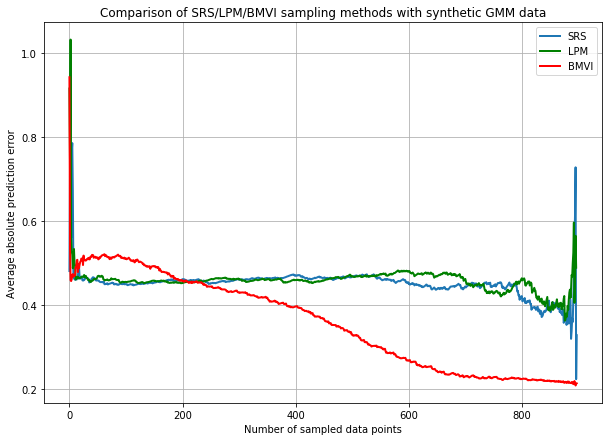

In [8]:
# STEP 4: Plot the sampling performance results. 
fig = plt.figure(figsize=(10, 7))
plt.plot(range(0, len(SRS_generalization_error_list)), SRS_generalization_error_list, linewidth=2)
plt.plot(range(0, len(LPM_generalization_error_list)), LPM_generalization_error_list, 'g', linewidth=2)
plt.plot(range(0, len(BMVI_generalization_error_list)), BMVI_generalization_error_list, 'r', linewidth=2)
plt.grid(True)
ax = plt.gca()
ax.set_xlabel('Number of sampled data points')
ax.set_ylabel('Average absolute prediction error')
ax.set_title('Comparison of SRS/LPM/BMVI sampling methods with synthetic GMM data')
ax.legend(('SRS', 'LPM', 'BMVI'))
plt.show()